Source:

The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale
platforms.


Description:

The dataset comprises 1061 records of used bike listings. These records include details about the bike's brand
and model, selling price, kilometers driven, ownership history, and other attributes. It is particularly useful for
resale value prediction, market analysis, and understanding buyer preferences.


The dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive
view of the second-hand bike market.
 =name: Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio")Z
 selling_price: Listed selling price in INR (Numeric, e.g., 175000, 45000)Z
 year: Manufacturing year of the bike (Numeric, e.g., 2019, 2015)Z
 seller_type: Seller category, either "Individual" or "Dealer" (Categorical)Z
 owner: Ownership history, e.g., "1st owner", "2nd owner" (Categorical)Z
 km_driven: Total kilometers driven (Numeric, in km, e.g., 12000, 23000)Z
 ex_showroom_price: Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc,.).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("BIKE DETAILS.csv")
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


1. What is the range of selling prices in the dataset?

In [5]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [6]:
df["selling_price"]

0       175000
1        45000
2       150000
3        65000
4        20000
         ...  
1056     17000
1057     16000
1058     15000
1059     12000
1060     10000
Name: selling_price, Length: 1061, dtype: int64

In [10]:
min_price = df["selling_price"].min()
max_price = df["selling_price"].max()
price_range = max_price - min_price
print(f"The range of selling price is [{min_price},{max_price}]")

The range of selling price is [5000,760000]


In [12]:
# 2. What is the median selling price for bikes in the dataset
median_selling_price = df["selling_price"].quantile(0.5)
print(f"The median selling price will be {median_selling_price}")

The median selling price will be 45000.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [27]:
# 3 What is the most common seller type
most_common_seller_type = df["seller_type"].value_counts().idxmax()
most_common_seller_type
count = df["seller_type"].value_counts().max()
count
print(f"Most Common Seller Type is {most_common_seller_type} occurs {count}")


Most Common Seller Type is Individual occurs 1055


In [28]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [31]:
df["km_driven"]

0          350
1         5650
2        12000
3        23000
4        21000
         ...  
1056    500000
1057     33000
1058     35000
1059     53000
1060     92233
Name: km_driven, Length: 1061, dtype: int64

In [38]:
# 4. How many bikes have driven more than 50,000 kilometers
no_of_bikes = df[df["km_driven"] >= 50000]["name"]
no_of_bikes
print(f"{len(no_of_bikes)} bikes has driven more than 50,000")

207 bikes has driven more than 50,000


In [50]:
# What is the average km_driven value for each ownership type
df.columns
avg_km_driven_value = df.groupby(["owner"])["km_driven"].mean()
avg_km_driven_value
for i in range(len(avg_km_driven_value)):
    print(f"Average km_driven of {avg_km_driven_value.index[i]} is {avg_km_driven_value.values[i].round(2)}")

Average km_driven of 1st owner is 32816.58
Average km_driven of 2nd owner is 39288.99
Average km_driven of 3rd owner is 33292.18
Average km_driven of 4th owner is 311500.0


In [57]:
# What proportion of bikes are from the year 2015 or older
df.columns
older_bikes = df[df["year"] <= 2015]
proportion = len(older_bikes)/len(df)
print(f"The proportion of bikes from 2015 or older {proportion:.2%}")

The proportion of bikes from 2015 or older 56.64%


In [59]:
# 7 What is the trend of missing values across the dataset
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

<Axes: ylabel='ex_showroom_price'>

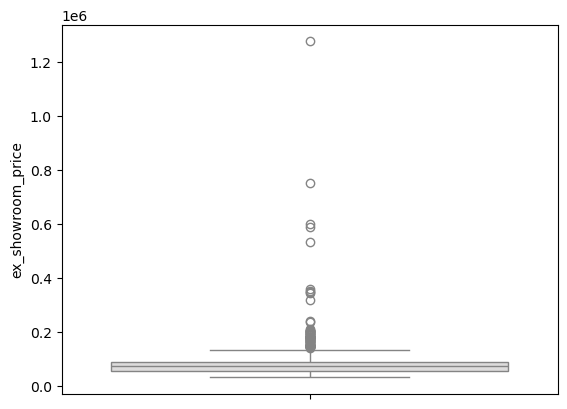

In [ ]:
df["ex_showroom_price"].isnull().sum()
sns.boxplot(df["ex_showroom_price"],palette="coolwarm")

In [65]:
# as there are some null values present so i can fill null values with median values
df["ex_showroom_price"].fillna(df["ex_showroom_price"].median())

0        72752.5
1        72752.5
2       148114.0
3        89643.0
4        72752.5
          ...   
1056     52000.0
1057     51000.0
1058     57000.0
1059     58000.0
1060     75000.0
Name: ex_showroom_price, Length: 1061, dtype: float64

In [73]:
# 8 What is the highest ex_showroom_price recorded, and for which bike
max = df["ex_showroom_price"].max()
bike_name = df[df["ex_showroom_price"] == max]["name"].values[0]
print(f"Highest Ex-Showroom Price : {max} for {bike_name}")


Highest Ex-Showroom Price : 1278000.0 for Harley-Davidson Street Bob


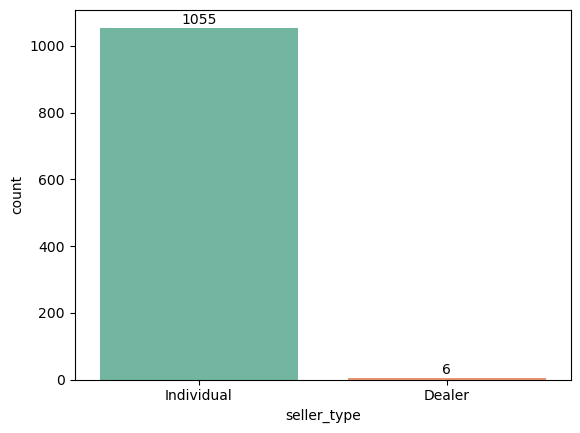

In [86]:
# 9 What is the total number of bikes listed by each seller type
df.columns
ax = sns.countplot(x=df["seller_type"],palette="Set2")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',(p.get_x()+p.get_width()/2,p.get_height() + 1),ha="center",va="bottom",fontsize=10,color="black")
plt.show()

In [87]:
df["owner"].unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [89]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

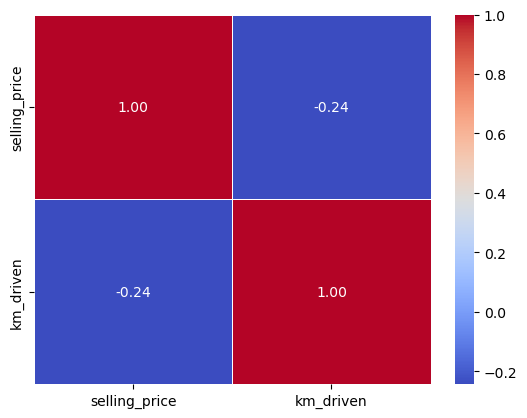

In [109]:
# What is the relationship between selling_price and km_driven for first-owner bikes
first_owner = df[df["owner"] == "1st owner"]
correlation = first_owner[["selling_price","km_driven"]].corr()
# sns.scatterplot(data=first_owner,x="km_driven",y="selling_price",alpha=0.5)
sns.heatmap(correlation,annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.show()


In [ ]:
# there is negative correlation between these two variables

Identify and remove outliers in the km_driven column using the IQR method

<Axes: ylabel='km_driven'>

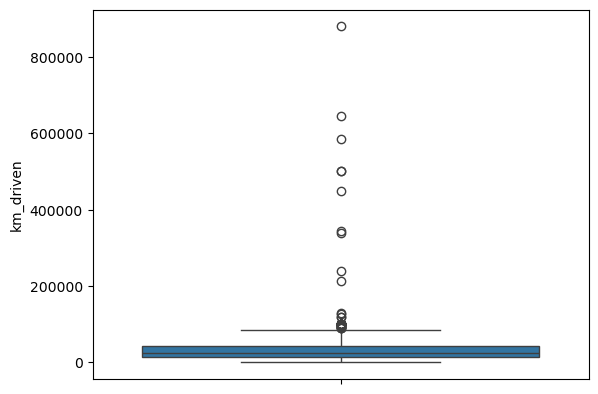

In [111]:
sns.boxplot(df["km_driven"])

In [113]:

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


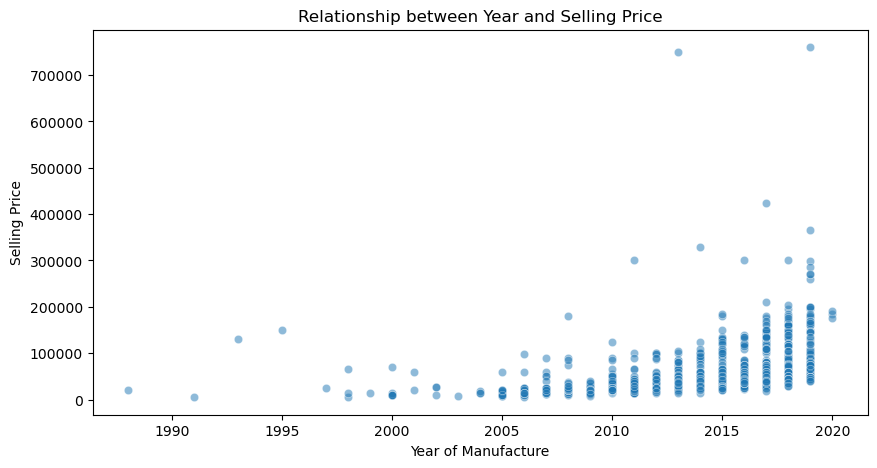

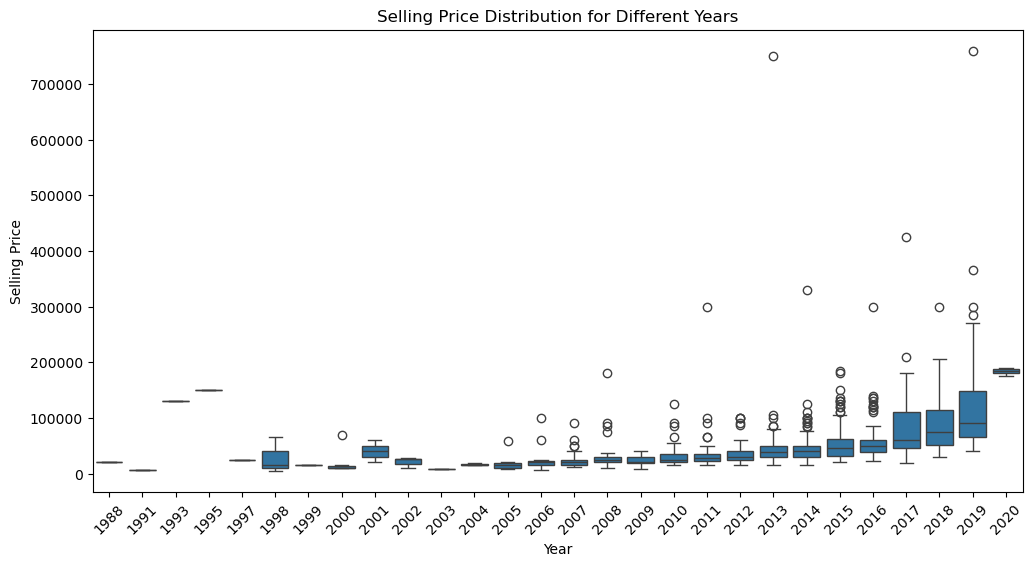

In [116]:
# Perform a bivariate analysis to visualize the relationship between year and selling_price
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["year"], y=df["selling_price"], alpha=0.5)
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.title("Relationship between Year and Selling Price")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df["year"], y=df["selling_price"])
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Selling Price Distribution for Different Years")
plt.show()



Average Depreciation: 7175.01 per year


<Axes: xlabel='age', ylabel='Depriciation'>

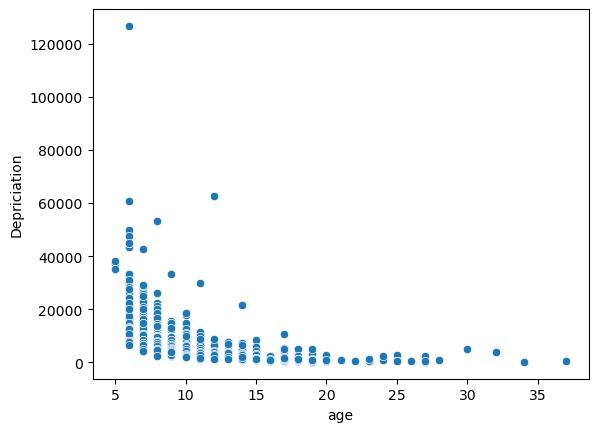

In [120]:
# What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)
df.columns
df["age"] = 2025 - df["year"]  # Assuming the current year is 2025
df["Depriciation"] = df["selling_price"]/df["age"]
average_depreciation = df["Depriciation"].mean()
print(f"Average Depreciation: {average_depreciation:.2f} per year")
sns.scatterplot(x=df["age"],y=df["Depriciation"])

# newew bikes has high depreciation than older bikes

In [141]:
#14. Which bike names are priced significantly above the average price for their manufacturing year
avg_price = df["selling_price"].mean().round(2)
bike_names = df[df["selling_price"] > avg_price]
# sns.scatterplot(x=df["year"], y=df["name"])
a=bike_names.groupby("year")["name"].value_counts()
a


year  name                                
1993  Royal Enfield Classic 350               1
1995  Royal Enfield Bullet 350 [2007-2011]    1
1998  Yamaha RX135                            1
2000  Yamaha Rx                               1
2006  Royal Enfield Electra 5 S               1
                                             ..
2019  Yamaha YZF R15 V3                       1
      Yamaha YZF R3                           1
2020  Jawa 42                                 1
      Royal Enfield Classic 350               1
      Royal Enfield Classic Gunmetal Grey     1
Name: count, Length: 205, dtype: int64

In [143]:
#There are totally 205 bikes which are more than avg in manufacturing years

<Axes: >

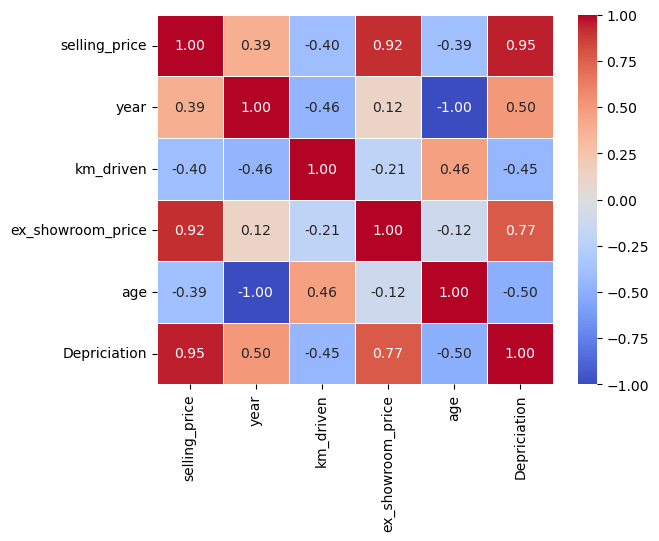

In [135]:
num_data = df.select_dtypes(exclude="object")
correlation = num_data.corr()
sns.heatmap(correlation,annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)